In [1]:
%config IPCompleter.greedy=True
%matplotlib inline

In [45]:
import pandas as pd, numpy as np, os, sys, re
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from IPython.display import display, HTML
from IPython.core.debugger import Tracer
from IPython.core.debugger import Pdb

import intuit_env
from intuit_bin import greaterThanProbs, lessThanProbs, greaterThanStats, inBinProbs, inBinStats
import attrition.attrition_model as attrition_model
import attrition.attrition_data as data
import data.pcg_customer_profile as profile

font = {'size'   : 18}
matplotlib.rc('font', **font)

In [106]:
ty = 2014
group = 'LACERTE'
newCANs = False
labelCol = 'NEXT_AT_RISK'
tyLabelCol = 'AT_RISK'

print('data for TY{} ...'.format(ty))
rawGrpData = data.RawGroupData(ty, group, newCANs=newCANs)
modData = attrition_model.ModelData(rawGrpData, segment=None, labelColumn=labelCol, positiveClass=True)
lac = modData.getData()
display(lac.head(4))

# right now I can only study the behavior with NEXT_AT_RISK because of NEXT_LOST in 'NEXT_' columns
yCol = 'NEXT_AT_RISK'
labels = lac[yCol]
pat = re.compile('LACERTE_NET_BILL_DISCOUNT_PCT|^UNL_|NEXT_|'+yCol)
cols = [col for col in lac.columns if pat.search(col) is not None]
df = lac[cols].copy()
print(np.sort(df.columns.tolist()))
df['NEXT_DISCOUNT_PCT_INC'] = df.NEXT_LACERTE_NET_BILL_DISCOUNT_PCT - df.LACERTE_NET_BILL_DISCOUNT_PCT

data for TY2014 ...
init cache group raw data = True
work on retention CANs in LACERTE ...
loading group from cache C:/Users/hwang7/Box Sync/work/workspace/cliff-diving/risk_data/TY2014/TY2014_LACERTE_retention_raw.csv ...
(17745, 596)
before filtering:
(15413, 595)
filter LACERTE_TOTAL_BILL with limit 2000.0 in group LACERTE ...
filter LACERTE_NET_BILL with limit 1500.0 in group LACERTE ...
after filtering:
(15303, 595)


,CAN,PRODUCT_FAMILY,ORDER_DATE,NET_BILL,NET_BILL_PRE_DISCOUNT,LACERTE_NET_BILL,LACERTE_NET_BILL_PRE_DISCOUNT,PS_NET_BILL,PS_NET_BILL_PRE_DISCOUNT,HAS_BNA,HAS_LACERTE_LIBRARY,HAS_EASYACCT,ORDER_MONTH,DISCOUNT,LACERTE_DISCOUNT,PS_DISCOUNT,NET_BILL_DISCOUNT_PCT,LACERTE_NET_BILL_DISCOUNT_PCT,PS_NET_BILL_DISCOUNT_PCT,REP_CLICK,REP_CLICK_1015,PPR_CLICK,PPR_CLICK_1015,TOTAL_BILL,TOTAL_BILL_1015,TOTAL_BILL_PRE_DISCOUNT,TOTAL_BILL_PRE_DISCOUNT_1015,LACERTE_TOTAL_BILL,LACERTE_TOTAL_BILL_PRE_DISCOUNT,PS_TOTAL_BILL,PS_TOTAL_BILL_1015,PS_TOTAL_BILL_PRE_DISCOUNT,PS_TOTAL_BILL_PRE_DISCOUNT_1015,TOTAL_BILL_DISCOUNT_PCT,LACERTE_TOTAL_BILL_DISCOUNT_PCT,PS_TOTAL_BILL_DISCOUNT_PCT,START_YEAR,LACERTE_CHANNEL,PS_CHANNEL,LAC_200_CNT,UNL_FED_IIT,UNL_FED_FID,UNL_FED_CORP,UNL_FED_SCORP,UNL_FED_PARTNER,UNL_FED_ESTATE,UNL_FED_EXEMPT_ORG,UNL_FED_GIFT,UNL_FED_BENEFIT,UNL_STATE_IIT,UNL_STATE_FID,UNL_STATE_CORP,UNL_STATE_SCORP,UNL_STATE_PARTNER,IS_EMPLOYEE,HAS_LAC200,PRODUCT_SEGMENT,PRODUCT_GROUP,HAS_DPP,HAS_AUTO_RENEW,ATTEMPTS,AT_RISK_REASON,COHORT,IS_DP,IS_RT,FIXED_PRICE_ENTITLEMENT,ONE_TIME_ENTITLEMENT,MULTI_YEAR_ENTITLEMENT,REP_FED_IIT,REP_FED_BIZ,REP_STATE_IIT,REP_STATE_BIZ,REP_STATE_ONLY_IIT,REP_STATE_ONLY_BIZ,REP_FED_IIT_1015,REP_FED_BIZ_1015,REP_STATE_IIT_1015,REP_STATE_BIZ_1015,REP_STATE_ONLY_IIT_1015,REP_STATE_ONLY_BIZ_1015,REP_FED_IIT_CLICK,REP_FED_BIZ_CLICK,REP_STATE_IIT_CLICK,REP_STATE_BIZ_CLICK,REP_STATE_ONLY_IIT_CLICK,REP_STATE_ONLY_BIZ_CLICK,REP_FED_IIT_CLICK_1015,REP_FED_BIZ_CLICK_1015,REP_STATE_IIT_CLICK_1015,REP_STATE_BIZ_CLICK_1015,REP_STATE_ONLY_IIT_CLICK_1015,REP_STATE_ONLY_BIZ_CLICK_1015,PPR_FED_IIT,PPR_FED_BIZ,PPR_STATE_IIT,PPR_STATE_BIZ,PPR_FED_IIT_1015,PPR_FED_BIZ_1015,PPR_STATE_IIT_1015,PPR_STATE_BIZ_1015,PPR_FED_IIT_NGA_CLICK,PPR_FED_BIZ_NGA_CLICK,PPR_STATE_IIT_NGA_CLICK,PPR_STATE_BIZ_NGA_CLICK,PPR_FED_IIT_NGA_CLICK_1015,PPR_FED_BIZ_NGA_CLICK_1015,PPR_STATE_IIT_NGA_CLICK_1015,PPR_STATE_BIZ_NGA_CLICK_1015,PPR_SIEBEL_CLICK,PPR_SIEBEL_CLICK_1015,FED_BIZ_0415,FED_REJECTED_BIZ_0415,STATE_BIZ_0415,BIZ_STATES_0415,FED_IIT_0415,FED_REJECTED_IIT_0415,STATE_IIT_0415,IIT_REFUND_CNT_0415,IIT_STATES_0415,FED_RT_0415,FED_REJECTED_RT_0415,SUM_IIT_AGI_0415,FED_BIZ_1015,FED_REJECTED_BIZ_1015,STATE_BIZ_1015,BIZ_STATES_1015,FED_IIT_1015,FED_REJECTED_IIT_1015,STATE_IIT_1015,IIT_REFUND_CNT_1015,IIT_STATES_1015,FED_RT_1015,FED_REJECTED_RT_1015,SUM_IIT_AGI_1015,TOTAL_INBOUND_COUNT,INBOUND_CALL_COUNT,INBOUND_CHAT_COUNT,INBOUND_CALL_HIGH_COUNT,INBOUND_CHAT_HIGH_COUNT,INBOUND_COUNT,INBOUND_HIGH_COUNT,PPR_NGA_FED_CLICK,PPR_NGA_STATE_CLICK,PPR_NGA_CLICK,PPR_NGA_FED_CLICK_1015,PPR_NGA_STATE_CLICK_1015,PPR_NGA_CLICK_1015,LACERTE_TOTAL_BILL_1015,EFE_TOTAL_FED_0415,EFE_TOTAL_FED_1015,EFE_TOTAL_STATE_0415,EFE_TOTAL_STATE_1015,COST_PER_UNIT_0415,COST_PER_UNIT_1015,STATE_INCOME,STATE_COST,STATE_FEE,BILL_INCOME_RATIO_1015,BILL_INCOME_RATIO,BILL_COST_RATIO_1015,BILL_COST_RATIO,BILL_FEE_RATIO_1015,BILL_FEE_RATIO,UNL_FED,UNL_FED_BIZ,UNL_STATE,UNL_STATE_BIZ,REP_CLICK_PCT,REP_CLICK_PCT_1015,PPR_CLICK_PCT,PPR_CLICK_PCT_1015,REP_FED,REP_FED_1015,REP_STATE,REP_STATE_1015,PPR_FED,PPR_FED_1015,PPR_STATE,PPR_STATE_1015,IIT_EXT_COUNT,BIZ_EXT_COUNT,EXT_COUNT,BIZ_IIT_RATIO,BIZ_IIT_RATIO_1015,PREV_ATTEMPTS,PREV_HAS_AUTO_RENEW,PREV_HAS_DPP,PREV_HAS_BNA,PREV_HAS_EASYACCT,PREV_HAS_LACERTE_LIBRARY,PREV_HAS_LAC200,PREV_FED_BIZ_0415,PREV_STATE_BIZ_0415,PREV_BIZ_STATES_0415,PREV_FED_IIT_0415,PREV_FED_REJECTED_IIT_0415,PREV_STATE_IIT_0415,PREV_IIT_REFUND_CNT_0415,PREV_IIT_STATES_0415,PREV_SUM_IIT_AGI_0415,PREV_FED_RT_0415,PREV_FED_REJECTED_RT_0415,PREV_FED_BIZ_1015,PREV_STATE_BIZ_1015,PREV_BIZ_STATES_1015,PREV_FED_IIT_1015,PREV_FED_REJECTED_IIT_1015,PREV_STATE_IIT_1015,PREV_IIT_REFUND_CNT_1015,PREV_IIT_STATES_1015,PREV_SUM_IIT_AGI_1015,PREV_FED_RT_1015,PREV_FED_REJECTED_RT_1015,PREV_UNL_FED,PREV_UNL_FED_BIZ,PREV_UNL_STATE,PREV_UNL_STATE_BIZ,PREV_LAC_200_CNT,PREV_UNL_FED_IIT,PREV_UNL_FED_FID,PREV_UNL_FED_CORP,PREV_UNL_FED_SCORP,PREV_UNL_FED_PARTNER,PREV_UNL_FED_ESTATE,PREV_UNL_FED_EXEMPT_O

['LACERTE_NET_BILL_DISCOUNT_PCT' 'NEXT_ATTEMPTS' 'NEXT_AT_RISK'
 'NEXT_AT_RISK_REASON' 'NEXT_COMPLETE_LOST' 'NEXT_DISCOUNT_PCT_INC'
 'NEXT_DOWNGRADE' 'NEXT_LACERTE_NET_BILL'
 'NEXT_LACERTE_NET_BILL_DISCOUNT_PCT' 'NEXT_LACERTE_NET_BILL_PRE_DISCOUNT'
 'NEXT_LACERTE_TOTAL_BILL' 'NEXT_LACERTE_TOTAL_BILL_1015'
 'NEXT_LACERTE_TOTAL_BILL_DISCOUNT_PCT'
 'NEXT_LACERTE_TOTAL_BILL_PRE_DISCOUNT' 'NEXT_LOST' 'NEXT_NET_BILL'
 'NEXT_NET_BILL_DISCOUNT_PCT' 'NEXT_NET_BILL_PRE_DISCOUNT' 'NEXT_NET_PCT'
 'NEXT_ORDER_MONTH' 'NEXT_ORDER_MONTH_CHANGE' 'NEXT_PRODUCT_FAMILY'
 'NEXT_PRODUCT_GROUP' 'NEXT_PRODUCT_SEGMENT' 'NEXT_PS_NET_BILL'
 'NEXT_PS_NET_BILL_DISCOUNT_PCT' 'NEXT_PS_TOTAL_BILL'
 'NEXT_PS_TOTAL_BILL_1015' 'NEXT_TOTAL_BILL' 'NEXT_TOTAL_BILL_1015'
 'NEXT_TOTAL_BILL_CHANGE_PCT' 'NEXT_TOTAL_BILL_DISCOUNT_PCT'
 'NEXT_TOTAL_BILL_PRE_DISCOUNT' 'NEXT_TOTAL_BILL_PRE_DISCOUNT_1015'
 'NEXT_TOTAL_PCT' 'PREV_LACERTE_NET_BILL_DISCOUNT_PCT' 'UNL_FED'
 'UNL_FED_BENEFIT' 'UNL_FED_BENEFIT_CHANGE' 'UNL_FED_BIZ'
 'UNL

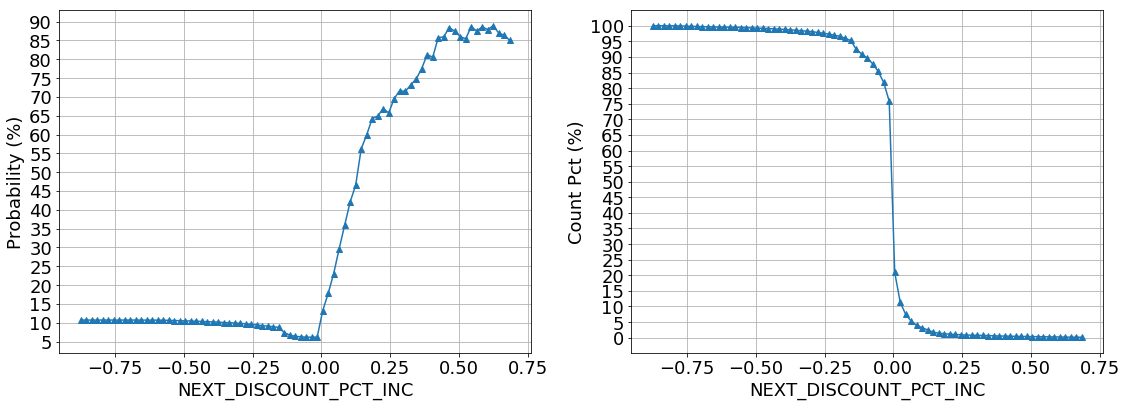

In [4]:
rs = greaterThanProbs(df.NEXT_DISCOUNT_PCT_INC, df.NEXT_AT_RISK, binSize=0.02, plot=True)

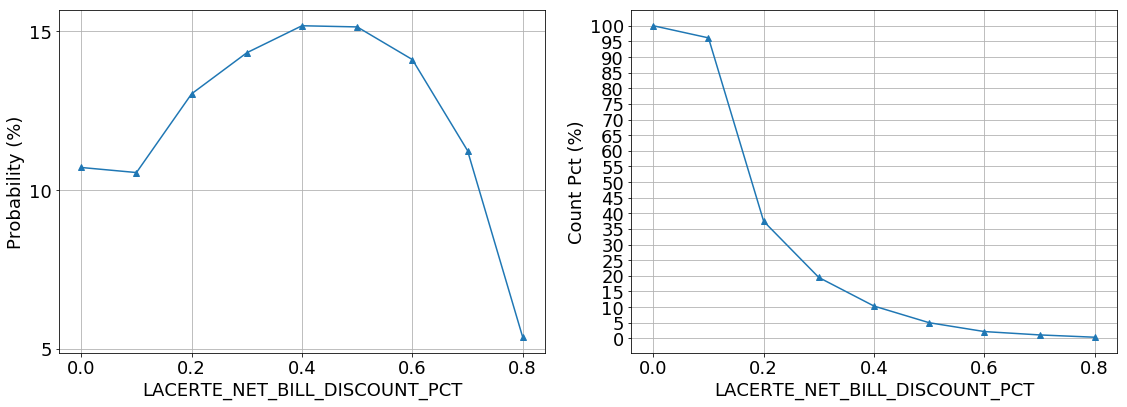

In [5]:
rs = greaterThanProbs(df.LACERTE_NET_BILL_DISCOUNT_PCT, df.NEXT_AT_RISK, binSize=0.1, plot=True)

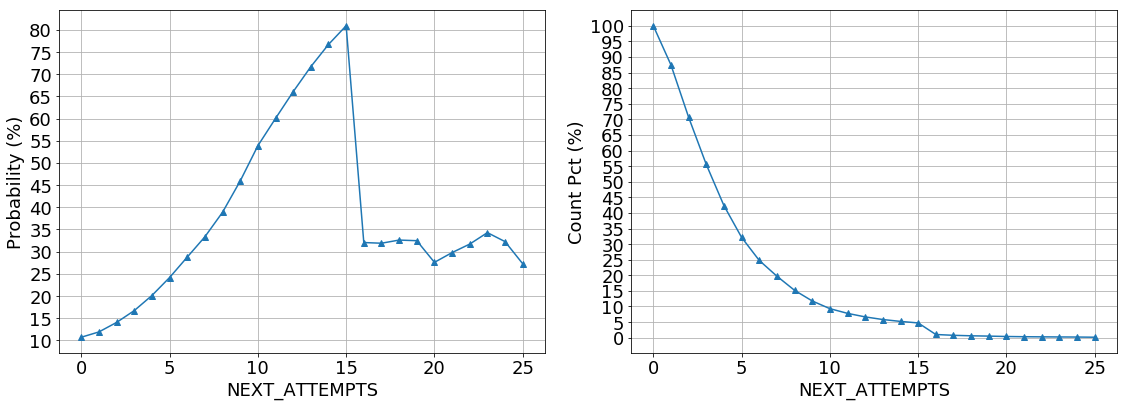

In [6]:
rs = greaterThanProbs(df.NEXT_ATTEMPTS, df.NEXT_AT_RISK, binSize=1, plot=True)

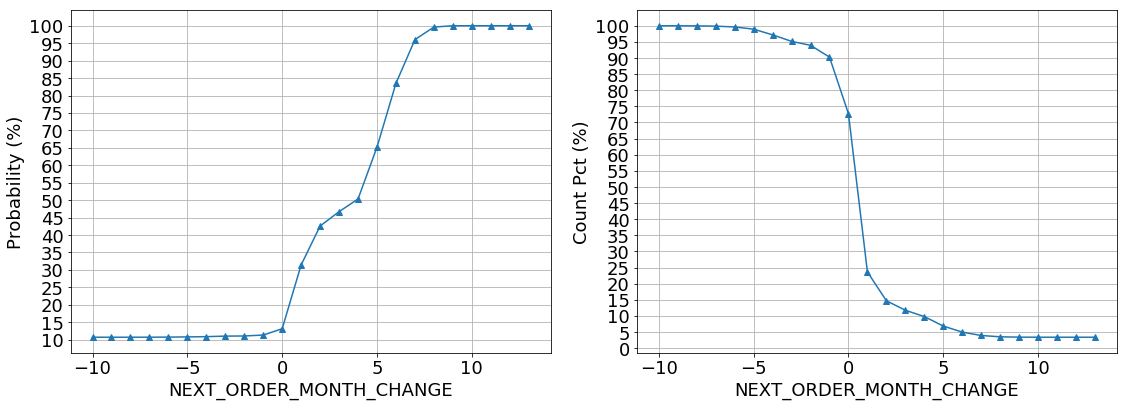

In [7]:
rs = greaterThanProbs(df.NEXT_ORDER_MONTH_CHANGE, df.NEXT_AT_RISK, binSize=1, plot=True)

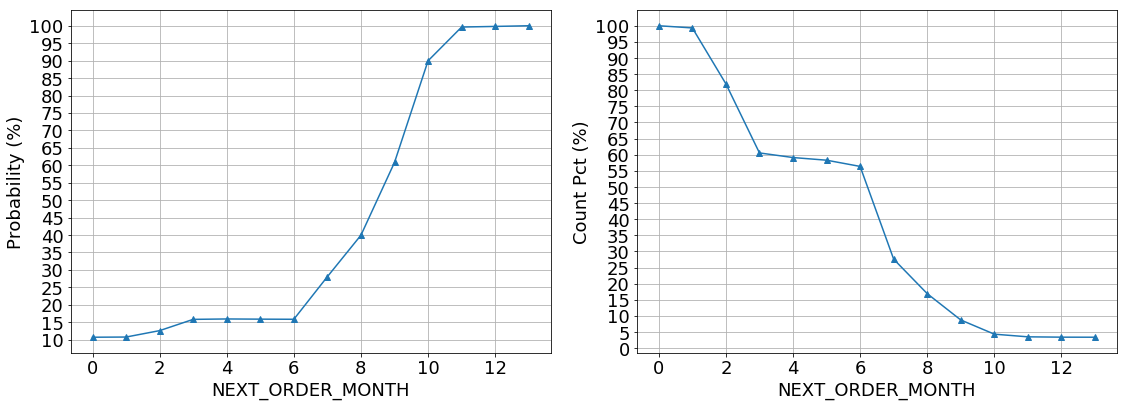

In [8]:
rs = greaterThanProbs(df.NEXT_ORDER_MONTH, df.NEXT_AT_RISK, binSize=1, plot=True)

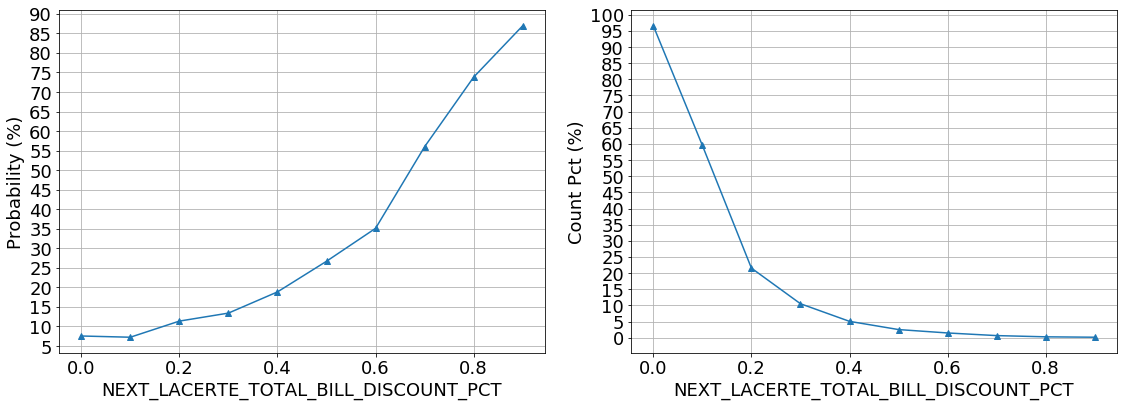

In [9]:
rs = greaterThanProbs(df.NEXT_LACERTE_TOTAL_BILL_DISCOUNT_PCT, df.NEXT_AT_RISK, binSize=0.1, plot=True)

In [10]:
rs = greaterThanProbs(df.NEXT_TOTAL_PCT, df.NEXT_AT_RISK, binSize=0.01, plot=True)
display(rs)

,NEXT_TOTAL_PCT,bucket,freq,prob,freq_pct


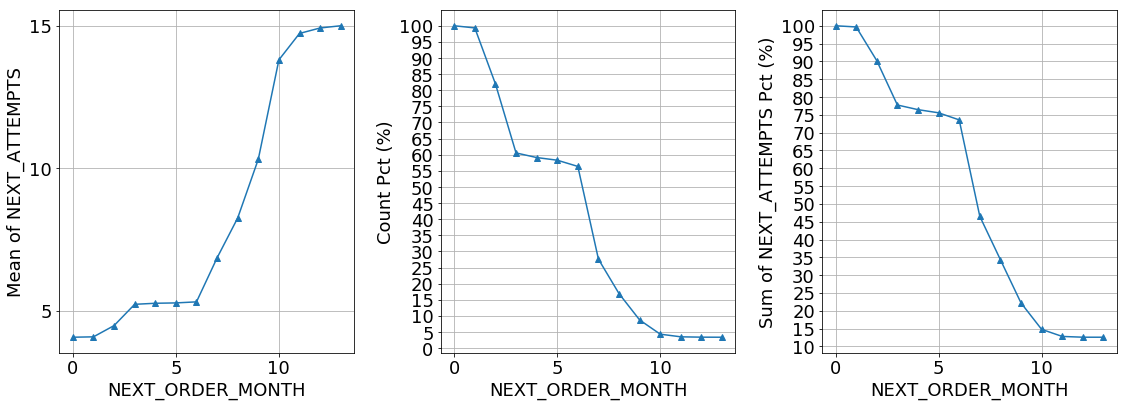

In [11]:
rs = greaterThanStats(df.NEXT_ORDER_MONTH, df.NEXT_ATTEMPTS, binSize=1, minx=0, plot=True)

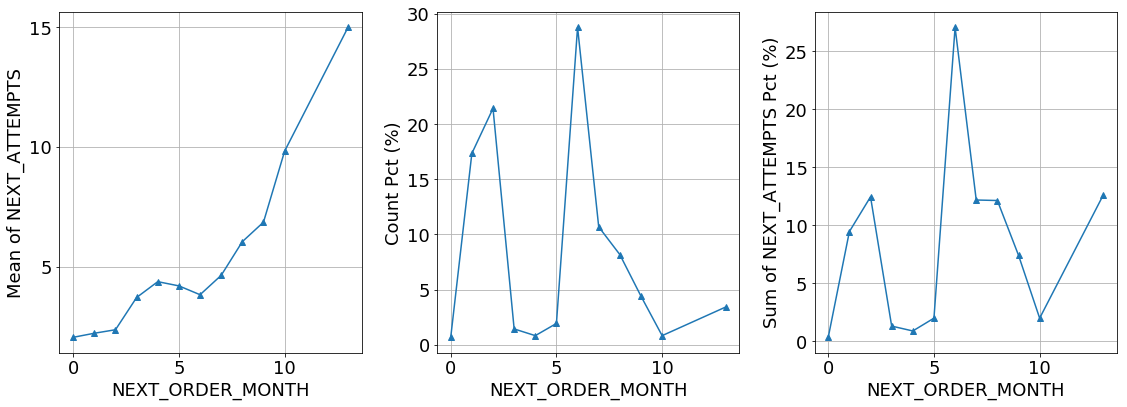

In [12]:
rs = inBinStats(df.NEXT_ORDER_MONTH, df.NEXT_ATTEMPTS, binSize=1, minx=0, plot=True)

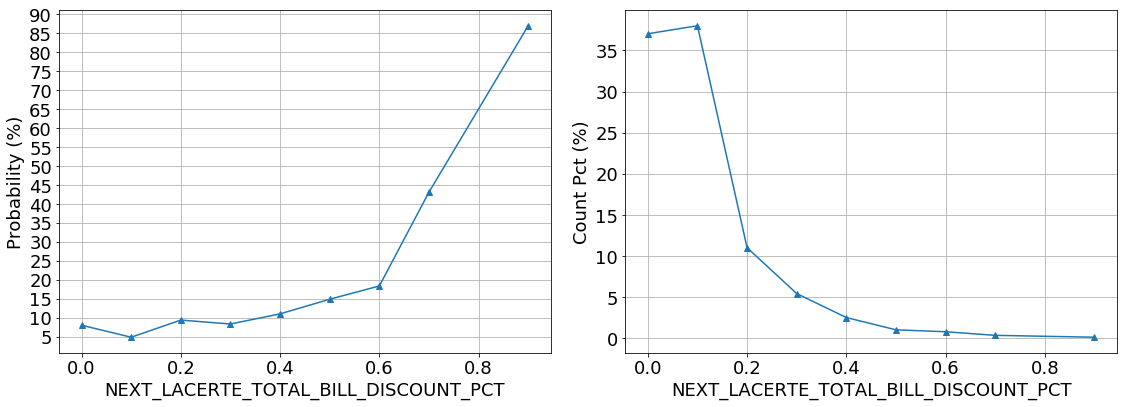

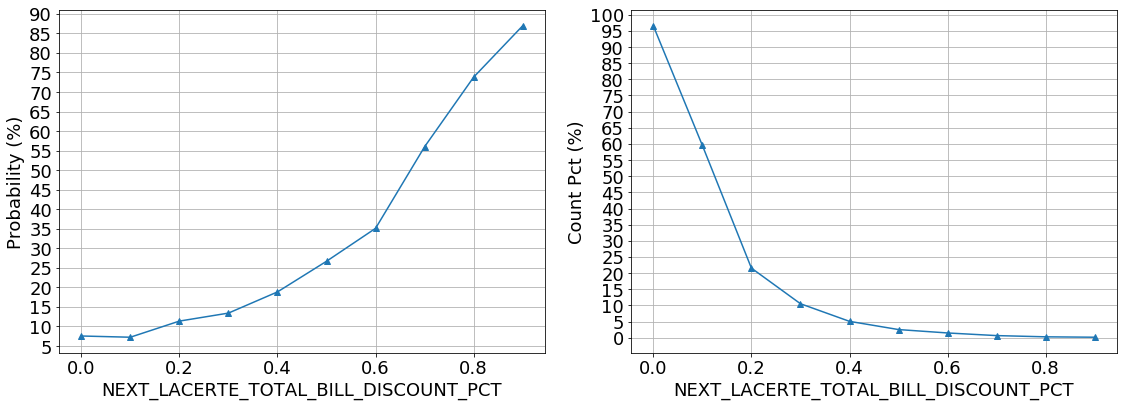

In [13]:
rs = inBinProbs(df.NEXT_LACERTE_TOTAL_BILL_DISCOUNT_PCT, df.NEXT_AT_RISK, binSize=0.1, plot=True)
rs = greaterThanProbs(df.NEXT_LACERTE_TOTAL_BILL_DISCOUNT_PCT, df.NEXT_AT_RISK, binSize=0.1, plot=True)

In [99]:
def loadLacerte(ty):
    dd = profile.getDesktopCustomerProfile(ty)
    dd = dd[(dd.PRODUCT_GROUP == 'LACERTE') & (~dd.IS_PM) & (dd.PRODUCT_SEGMENT != 'DIAMOND PASSPORT') & (dd.COHORT > 1.1)]
    dd = attrition_model.filterDataByBills(dd, 'LACERTE', newCANs=False)
    return dd

p14 = loadLacerte(2014)
p15 = profile.getDesktopCustomerProfile(2015)
p14.index = p14.CAN
p15.index = p15.CAN
print(p15.shape)

p14['NEXT_LOST'] = True
p14.loc[p14.CAN.isin(p15.CAN), 'NEXT_LOST'] = False
display(p14.NEXT_LOST.value_counts())

ss = p15[['CAN', 'PRODUCT_GROUP', 'AT_RISK_REASON', 'IS_PM', 'IS_DP', 'ATTEMPTS']].copy()
ss.columns = ['CAN', 'NEXT_PRODUCT_GROUP', 'NEXT_AT_RISK_REASON', 'NEXT_IS_PM', 'NEXT_IS_DP', 'NEXT_ATTEMPTS']
p14 = p14.merge(ss, on='CAN', how='left')
p14 = p14.fillna({'NEXT_PRODUCT_GROUP' : 'NONE', 'NEXT_AT_RISK_REASON' : '',
                  'NEXT_IS_PM' : False, 'NEXT_IS_DP' : False, 'NEXT_ATTEMPTS' : 0})
display(pd.crosstab(p14.PRODUCT_GROUP, p14.NEXT_PRODUCT_GROUP))
display(p14.NEXT_AT_RISK_REASON.value_counts())
display(p14.NEXT_IS_PM.value_counts())
display(p14.NEXT_IS_DP.value_counts())

loading from C:/PTG_DataScience/spark_cache/desktop_profile_TY2014.csv ...
before filtering:
(15504, 186)
filter LACERTE_TOTAL_BILL with limit 2000.0 in group LACERTE ...
filter LACERTE_NET_BILL with limit 1500.0 in group LACERTE ...
after filtering:
(15311, 186)
loading from C:/PTG_DataScience/spark_cache/desktop_profile_TY2015.csv ...
(96333, 186)


False    14789
True       522
Name: NEXT_LOST, dtype: int64

NEXT_PRODUCT_GROUP,BASIC,LACERTE,NONE,PROSERIES,REP
PRODUCT_GROUP,,,,,
LACERTE,1,14328,522,19,441


                  14446
Price               375
Uncontrollable      263
Product             117
Competitive          42
Unknown              37
Service              31
Name: NEXT_AT_RISK_REASON, dtype: int64

False    15024
True       287
Name: NEXT_IS_PM, dtype: int64

False    15092
True       219
Name: NEXT_IS_DP, dtype: int64

In [100]:
def computeNextDowngrade(currs):
    currs['NEXT_DOWNGRADE'] = False
    currs.loc[(currs.PRODUCT_GROUP == 'LACERTE') & (currs.NEXT_PRODUCT_GROUP != 'LACERTE'), 'NEXT_DOWNGRADE'] = True
    currs.loc[(currs.PRODUCT_GROUP == 'PROSERIES') & (~currs.NEXT_PRODUCT_GROUP.isin(['LACERTE', 'PROSERIES'])), 'NEXT_DOWNGRADE'] = True
    currs.loc[(currs.PRODUCT_GROUP == 'REP') & (~currs.NEXT_PRODUCT_GROUP.isin(['LACERTE', 'PROSERIES', 'REP'])), 'NEXT_DOWNGRADE'] = True
    currs.loc[(currs.PRODUCT_GROUP == 'BASIC') & currs.NEXT_PRODUCT_GROUP.isin(['PPR', 'ITO']), 'NEXT_DOWNGRADE'] = True
    currs.loc[(currs.PRODUCT_GROUP == 'PPR') & (currs.NEXT_PRODUCT_GROUP == 'ITO'), 'NEXT_DOWNGRADE'] = True

    return currs

p14 = computeNextDowngrade(p14)
print(p14.NEXT_DOWNGRADE.value_counts())
p14 = profile.computeNextUpgrade(p14)
print(p14.NEXT_UPGRADE.value_counts())

p14['NEXT_AT_RISK'] = False
p14.loc[p14.NEXT_DOWNGRADE, 'NEXT_AT_RISK'] = True
p14.loc[p14.NEXT_LOST, 'NEXT_AT_RISK'] = True
p14.loc[p14.NEXT_AT_RISK_REASON != '', 'NEXT_AT_RISK'] = True
print(p14.NEXT_LOST.value_counts())
print(p14.NEXT_AT_RISK.value_counts())

False    14328
True       983
Name: NEXT_DOWNGRADE, dtype: int64
False    15311
Name: NEXT_UPGRADE, dtype: int64
False    14789
True       522
Name: NEXT_LOST, dtype: int64
False    13671
True      1640
Name: NEXT_AT_RISK, dtype: int64


In [107]:
pat = re.compile('^UNL_')
cols = [col for col in p14.columns if pat.search(col) is not None]
nextCols = ['NEXT_'+col for col in cols]

ss = p15[cols]
ss.columns = nextCols
df_1 = p14.merge(ss, how='left', left_index=True, right_index=True)
df_1 = df_1.fillna({k : 0 for k in cols})
df_1 = df_1.fillna({k : 0 for k in nextCols})
display(df_1.head(4))
print(df_1.shape)

,CAN,PRODUCT_FAMILY,ORDER_DATE,NET_BILL,NET_BILL_PRE_DISCOUNT,LACERTE_NET_BILL,LACERTE_NET_BILL_PRE_DISCOUNT,PS_NET_BILL,PS_NET_BILL_PRE_DISCOUNT,HAS_BNA,HAS_LACERTE_LIBRARY,HAS_EASYACCT,ORDER_MONTH,DISCOUNT,LACERTE_DISCOUNT,PS_DISCOUNT,NET_BILL_DISCOUNT_PCT,LACERTE_NET_BILL_DISCOUNT_PCT,PS_NET_BILL_DISCOUNT_PCT,REP_CLICK,REP_CLICK_1015,PPR_CLICK,PPR_CLICK_1015,TOTAL_BILL,TOTAL_BILL_1015,TOTAL_BILL_PRE_DISCOUNT,TOTAL_BILL_PRE_DISCOUNT_1015,LACERTE_TOTAL_BILL,LACERTE_TOTAL_BILL_PRE_DISCOUNT,PS_TOTAL_BILL,PS_TOTAL_BILL_1015,PS_TOTAL_BILL_PRE_DISCOUNT,PS_TOTAL_BILL_PRE_DISCOUNT_1015,TOTAL_BILL_DISCOUNT_PCT,LACERTE_TOTAL_BILL_DISCOUNT_PCT,PS_TOTAL_BILL_DISCOUNT_PCT,START_YEAR,LACERTE_CHANNEL,PS_CHANNEL,LAC_200_CNT,UNL_FED_IIT,UNL_FED_FID,UNL_FED_CORP,UNL_FED_SCORP,UNL_FED_PARTNER,UNL_FED_ESTATE,UNL_FED_EXEMPT_ORG,UNL_FED_GIFT,UNL_FED_BENEFIT,UNL_STATE_IIT,UNL_STATE_FID,UNL_STATE_CORP,UNL_STATE_SCORP,UNL_STATE_PARTNER,IS_EMPLOYEE,HAS_LAC200,PRODUCT_SEGMENT,PRODUCT_GROUP,HAS_DPP,HAS_AUTO_RENEW,ATTEMPTS,AT_RISK_REASON,COHORT,IS_PM,IS_DP,IS_RT,FIXED_PRICE_ENTITLEMENT,ONE_TIME_ENTITLEMENT,MULTI_YEAR_ENTITLEMENT,REP_FED_IIT,REP_FED_BIZ,REP_STATE_IIT,REP_STATE_BIZ,REP_STATE_ONLY_IIT,REP_STATE_ONLY_BIZ,REP_FED_IIT_1015,REP_FED_BIZ_1015,REP_STATE_IIT_1015,REP_STATE_BIZ_1015,REP_STATE_ONLY_IIT_1015,REP_STATE_ONLY_BIZ_1015,REP_FED_IIT_CLICK,REP_FED_BIZ_CLICK,REP_STATE_IIT_CLICK,REP_STATE_BIZ_CLICK,REP_STATE_ONLY_IIT_CLICK,REP_STATE_ONLY_BIZ_CLICK,REP_FED_IIT_CLICK_1015,REP_FED_BIZ_CLICK_1015,REP_STATE_IIT_CLICK_1015,REP_STATE_BIZ_CLICK_1015,REP_STATE_ONLY_IIT_CLICK_1015,REP_STATE_ONLY_BIZ_CLICK_1015,PPR_FED_IIT,PPR_FED_BIZ,PPR_STATE_IIT,PPR_STATE_BIZ,PPR_FED_IIT_1015,PPR_FED_BIZ_1015,PPR_STATE_IIT_1015,PPR_STATE_BIZ_1015,PPR_FED_IIT_NGA_CLICK,PPR_FED_BIZ_NGA_CLICK,PPR_STATE_IIT_NGA_CLICK,PPR_STATE_BIZ_NGA_CLICK,PPR_FED_IIT_NGA_CLICK_1015,PPR_FED_BIZ_NGA_CLICK_1015,PPR_STATE_IIT_NGA_CLICK_1015,PPR_STATE_BIZ_NGA_CLICK_1015,PPR_SIEBEL_CLICK,PPR_SIEBEL_CLICK_1015,FED_BIZ_0415,FED_REJECTED_BIZ_0415,STATE_BIZ_0415,BIZ_STATES_0415,FED_IIT_0415,FED_REJECTED_IIT_0415,STATE_IIT_0415,IIT_REFUND_CNT_0415,IIT_STATES_0415,FED_RT_0415,FED_REJECTED_RT_0415,SUM_IIT_AGI_0415,FED_BIZ_1015,FED_REJECTED_BIZ_1015,STATE_BIZ_1015,BIZ_STATES_1015,FED_IIT_1015,FED_REJECTED_IIT_1015,STATE_IIT_1015,IIT_REFUND_CNT_1015,IIT_STATES_1015,FED_RT_1015,FED_REJECTED_RT_1015,SUM_IIT_AGI_1015,TOTAL_INBOUND_COUNT,INBOUND_CALL_COUNT,INBOUND_CHAT_COUNT,INBOUND_CALL_HIGH_COUNT,INBOUND_CHAT_HIGH_COUNT,INBOUND_COUNT,INBOUND_HIGH_COUNT,PPR_NGA_FED_CLICK,PPR_NGA_STATE_CLICK,PPR_NGA_CLICK,PPR_NGA_FED_CLICK_1015,PPR_NGA_STATE_CLICK_1015,PPR_NGA_CLICK_1015,LACERTE_TOTAL_BILL_1015,EFE_TOTAL_FED_0415,EFE_TOTAL_FED_1015,EFE_TOTAL_STATE_0415,EFE_TOTAL_STATE_1015,COST_PER_UNIT_0415,COST_PER_UNIT_1015,STATE_RESIDE,STATE_INCOME,STATE_COST,STATE_FEE,BILL_INCOME_RATIO_1015,BILL_INCOME_RATIO,BILL_COST_RATIO_1015,BILL_COST_RATIO,BILL_FEE_RATIO_1015,BILL_FEE_RATIO,UNL_FED,UNL_FED_BIZ,UNL_STATE,UNL_STATE_BIZ,REP_CLICK_PCT,REP_CLICK_PCT_1015,PPR_CLICK_PCT,PPR_CLICK_PCT_1015,REP_FED,REP_FED_1015,REP_STATE,REP_STATE_1015,PPR_FED,PPR_FED_1015,PPR_STATE,PPR_STATE_1015,IIT_EXT_COUNT,BIZ_EXT_COUNT,EXT_COUNT,BIZ_IIT_RATIO,BIZ_IIT_RATIO_1015,NEXT_LOST,NEXT_PRODUCT_GROUP,NEXT_AT_RISK_REASON,NEXT_IS_PM,NEXT_IS_DP,NEXT_ATTEMPTS,NEXT_DOWNGRADE,NEXT_UPGRADE,NEXT_AT_RISK,NEXT_UNL_FED_IIT,NEXT_UNL_FED_FID,NEXT_UNL_FED_CORP,NEXT_UNL_FED_SCORP,NEXT_UNL_FED_PARTNER,NEXT_UNL_FED_ESTATE,NEXT_UNL_FED_EXEMPT_ORG,NEXT_UNL_FED_GIFT,NEXT_UNL_FED_BENEFIT,NEXT_UNL_STATE_IIT,NEXT_UNL_STATE_FID,NEXT_UNL_STATE_CORP,NEXT_UNL_STATE_SCORP,NEXT_UNL_STATE_PARTNER,NEXT_UNL_FED,NEXT_UNL_FED_BIZ,NEXT_UNL_STATE,NEXT_UNL_STATE_BIZ
0,102,LACERTE,722,4643.30,5393.0,4643.30,5393,0.0,0,f,f,f,3,749.70,749.70,0.0,0.139014,0.139014,0.0,871.0,902.0,0,0,5514.30,5545.30,6264.0,6295.0,5514.30,6264.0,0.0,0.0,0,0,0.119684,0.119684,0.0,1986,TEL,UNKNOWN,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,False,False,UNL FED 1040 ONLY,LACERTE,False,False,6,,3,False,False,False,Fa

(15311, 213)


In [108]:
for col in cols:
    nextCol = 'NEXT_'+col
    changeCol = nextCol + '_CHANGE'
    df_1[changeCol] = df_1[nextCol] - df[col]
display(df_1.head(4))
print(df_1.shape)

,CAN,PRODUCT_FAMILY,ORDER_DATE,NET_BILL,NET_BILL_PRE_DISCOUNT,LACERTE_NET_BILL,LACERTE_NET_BILL_PRE_DISCOUNT,PS_NET_BILL,PS_NET_BILL_PRE_DISCOUNT,HAS_BNA,HAS_LACERTE_LIBRARY,HAS_EASYACCT,ORDER_MONTH,DISCOUNT,LACERTE_DISCOUNT,PS_DISCOUNT,NET_BILL_DISCOUNT_PCT,LACERTE_NET_BILL_DISCOUNT_PCT,PS_NET_BILL_DISCOUNT_PCT,REP_CLICK,REP_CLICK_1015,PPR_CLICK,PPR_CLICK_1015,TOTAL_BILL,TOTAL_BILL_1015,TOTAL_BILL_PRE_DISCOUNT,TOTAL_BILL_PRE_DISCOUNT_1015,LACERTE_TOTAL_BILL,LACERTE_TOTAL_BILL_PRE_DISCOUNT,PS_TOTAL_BILL,PS_TOTAL_BILL_1015,PS_TOTAL_BILL_PRE_DISCOUNT,PS_TOTAL_BILL_PRE_DISCOUNT_1015,TOTAL_BILL_DISCOUNT_PCT,LACERTE_TOTAL_BILL_DISCOUNT_PCT,PS_TOTAL_BILL_DISCOUNT_PCT,START_YEAR,LACERTE_CHANNEL,PS_CHANNEL,LAC_200_CNT,UNL_FED_IIT,UNL_FED_FID,UNL_FED_CORP,UNL_FED_SCORP,UNL_FED_PARTNER,UNL_FED_ESTATE,UNL_FED_EXEMPT_ORG,UNL_FED_GIFT,UNL_FED_BENEFIT,UNL_STATE_IIT,UNL_STATE_FID,UNL_STATE_CORP,UNL_STATE_SCORP,UNL_STATE_PARTNER,IS_EMPLOYEE,HAS_LAC200,PRODUCT_SEGMENT,PRODUCT_GROUP,HAS_DPP,HAS_AUTO_RENEW,ATTEMPTS,AT_RISK_REASON,COHORT,IS_PM,IS_DP,IS_RT,FIXED_PRICE_ENTITLEMENT,ONE_TIME_ENTITLEMENT,MULTI_YEAR_ENTITLEMENT,REP_FED_IIT,REP_FED_BIZ,REP_STATE_IIT,REP_STATE_BIZ,REP_STATE_ONLY_IIT,REP_STATE_ONLY_BIZ,REP_FED_IIT_1015,REP_FED_BIZ_1015,REP_STATE_IIT_1015,REP_STATE_BIZ_1015,REP_STATE_ONLY_IIT_1015,REP_STATE_ONLY_BIZ_1015,REP_FED_IIT_CLICK,REP_FED_BIZ_CLICK,REP_STATE_IIT_CLICK,REP_STATE_BIZ_CLICK,REP_STATE_ONLY_IIT_CLICK,REP_STATE_ONLY_BIZ_CLICK,REP_FED_IIT_CLICK_1015,REP_FED_BIZ_CLICK_1015,REP_STATE_IIT_CLICK_1015,REP_STATE_BIZ_CLICK_1015,REP_STATE_ONLY_IIT_CLICK_1015,REP_STATE_ONLY_BIZ_CLICK_1015,PPR_FED_IIT,PPR_FED_BIZ,PPR_STATE_IIT,PPR_STATE_BIZ,PPR_FED_IIT_1015,PPR_FED_BIZ_1015,PPR_STATE_IIT_1015,PPR_STATE_BIZ_1015,PPR_FED_IIT_NGA_CLICK,PPR_FED_BIZ_NGA_CLICK,PPR_STATE_IIT_NGA_CLICK,PPR_STATE_BIZ_NGA_CLICK,PPR_FED_IIT_NGA_CLICK_1015,PPR_FED_BIZ_NGA_CLICK_1015,PPR_STATE_IIT_NGA_CLICK_1015,PPR_STATE_BIZ_NGA_CLICK_1015,PPR_SIEBEL_CLICK,PPR_SIEBEL_CLICK_1015,FED_BIZ_0415,FED_REJECTED_BIZ_0415,STATE_BIZ_0415,BIZ_STATES_0415,FED_IIT_0415,FED_REJECTED_IIT_0415,STATE_IIT_0415,IIT_REFUND_CNT_0415,IIT_STATES_0415,FED_RT_0415,FED_REJECTED_RT_0415,SUM_IIT_AGI_0415,FED_BIZ_1015,FED_REJECTED_BIZ_1015,STATE_BIZ_1015,BIZ_STATES_1015,FED_IIT_1015,FED_REJECTED_IIT_1015,STATE_IIT_1015,IIT_REFUND_CNT_1015,IIT_STATES_1015,FED_RT_1015,FED_REJECTED_RT_1015,SUM_IIT_AGI_1015,TOTAL_INBOUND_COUNT,INBOUND_CALL_COUNT,INBOUND_CHAT_COUNT,INBOUND_CALL_HIGH_COUNT,INBOUND_CHAT_HIGH_COUNT,INBOUND_COUNT,INBOUND_HIGH_COUNT,PPR_NGA_FED_CLICK,PPR_NGA_STATE_CLICK,PPR_NGA_CLICK,PPR_NGA_FED_CLICK_1015,PPR_NGA_STATE_CLICK_1015,PPR_NGA_CLICK_1015,LACERTE_TOTAL_BILL_1015,EFE_TOTAL_FED_0415,EFE_TOTAL_FED_1015,EFE_TOTAL_STATE_0415,EFE_TOTAL_STATE_1015,COST_PER_UNIT_0415,COST_PER_UNIT_1015,STATE_RESIDE,STATE_INCOME,STATE_COST,STATE_FEE,BILL_INCOME_RATIO_1015,BILL_INCOME_RATIO,BILL_COST_RATIO_1015,BILL_COST_RATIO,BILL_FEE_RATIO_1015,BILL_FEE_RATIO,UNL_FED,UNL_FED_BIZ,UNL_STATE,UNL_STATE_BIZ,REP_CLICK_PCT,REP_CLICK_PCT_1015,PPR_CLICK_PCT,PPR_CLICK_PCT_1015,REP_FED,REP_FED_1015,REP_STATE,REP_STATE_1015,PPR_FED,PPR_FED_1015,PPR_STATE,PPR_STATE_1015,IIT_EXT_COUNT,BIZ_EXT_COUNT,EXT_COUNT,BIZ_IIT_RATIO,BIZ_IIT_RATIO_1015,NEXT_LOST,NEXT_PRODUCT_GROUP,NEXT_AT_RISK_REASON,NEXT_IS_PM,NEXT_IS_DP,NEXT_ATTEMPTS,NEXT_DOWNGRADE,NEXT_UPGRADE,NEXT_AT_RISK,NEXT_UNL_FED_IIT,NEXT_UNL_FED_FID,NEXT_UNL_FED_CORP,NEXT_UNL_FED_SCORP,NEXT_UNL_FED_PARTNER,NEXT_UNL_FED_ESTATE,NEXT_UNL_FED_EXEMPT_ORG,NEXT_UNL_FED_GIFT,NEXT_UNL_FED_BENEFIT,NEXT_UNL_STATE_IIT,NEXT_UNL_STATE_FID,NEXT_UNL_STATE_CORP,NEXT_UNL_STATE_SCORP,NEXT_UNL_STATE_PARTNER,NEXT_UNL_FED,NEXT_UNL_FED_BIZ,NEXT_UNL_STATE,NEXT_UNL_STATE_BIZ,NEXT_UNL_FED_IIT_CHANGE,NEXT_UNL_FED_FID_CHANGE,NEXT_UNL_FED_CORP_CHANGE,NEXT_UNL_FED_SCORP_CHANGE,NEXT_UNL_FED_PARTNER_CHANGE,NEXT_UNL_FED_ESTATE_CHANGE,NEXT_UNL_FED_EXEMPT_ORG_CHANGE,NEXT_UNL_FED_GIFT_CHANGE,NEXT_UNL_FED_BENEFIT_CHANGE,NEXT_UNL_STATE_IIT_CHANGE,NEXT_UNL_STATE_FID_CHANGE,NEXT_UNL_STATE_CORP_CHANGE,

(15311, 231)


In [112]:
df.NEXT_ATTEMPTS.value_counts().sort_index()

0     1922
1     2566
2     2317
3     2019
4     1558
5     1131
6      773
7      694
8      522
9      377
10     231
11     174
12     129
13      92
14      75
15     567
16      40
17      24
18      15
19      19
20      11
21       6
22       6
23       4
24       9
25       3
26       2
27       2
29       3
30       3
32       1
34       1
78       1
92       1
93       2
94       1
96       1
99       1
Name: NEXT_ATTEMPTS, dtype: int64

In [111]:
df_1.NEXT_ATTEMPTS.value_counts().sort_index()

0.0     2447
1.0     2567
2.0     2318
3.0     2021
4.0     1558
5.0     1131
6.0      773
7.0      695
8.0      522
9.0      377
10.0     231
11.0     174
12.0     129
13.0      92
14.0      75
15.0      45
16.0      40
17.0      24
18.0      15
19.0      19
20.0      11
21.0       6
22.0       6
23.0       4
24.0       9
25.0       3
26.0       2
27.0       2
29.0       3
30.0       3
32.0       1
34.0       1
78.0       1
92.0       1
93.0       2
94.0       1
96.0       1
99.0       1
Name: NEXT_ATTEMPTS, dtype: int64

In [113]:
[df.shape, df_1.shape]

[(15303, 72), (15311, 231)]

In [114]:
print(df.NEXT_AT_RISK.value_counts())
print(df_1.NEXT_AT_RISK.value_counts())

False    13664
True      1639
Name: NEXT_AT_RISK, dtype: int64
False    13671
True      1640
Name: NEXT_AT_RISK, dtype: int64


,NEXT_ATTEMPTS,bucket,freq,prob,freq_pct
0,0.0,>= 0.000,15303,0.107103,1.000000
1,1.0,>= 1.000,13381,0.119049,0.874404
2,2.0,>= 2.000,10815,0.140453,0.706724
3,3.0,>= 3.000,8498,0.167098,0.555316
4,4.0,>= 4.000,6479,0.201111,0.423381
5,5.0,>= 5.000,4921,0.241618,0.321571
6,6.0,>= 6.000,3790,0.287599,0.247664
7,7.0,>= 7.000,3017,0.333444,0.197151
8,8.0,>= 8.000,2323,0.388721,0.151800
9,9.0,>= 9.000,1801,0.459189,0.117689


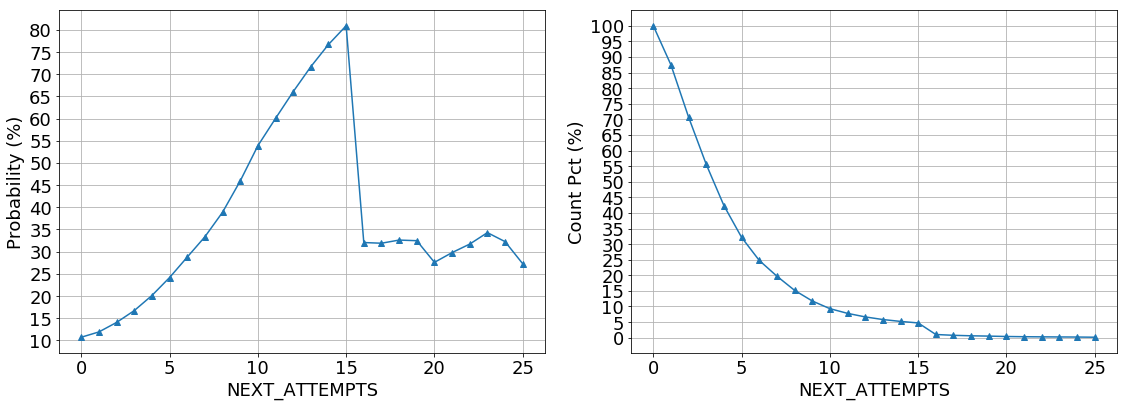

In [115]:
greaterThanProbs(df.NEXT_ATTEMPTS, df.NEXT_AT_RISK, binSize=1, plot=True)

,NEXT_ATTEMPTS,bucket,freq,prob,freq_pct
0,0.0,>= 0.000,15311,0.107113,1.000000
1,1.0,>= 1.000,12864,0.083333,0.840180
2,2.0,>= 2.000,10297,0.096921,0.672523
3,3.0,>= 3.000,7979,0.112671,0.521129
4,4.0,>= 4.000,5958,0.131084,0.389132
5,5.0,>= 5.000,4400,0.151591,0.287375
6,6.0,>= 6.000,3269,0.173753,0.213507
7,7.0,>= 7.000,2496,0.193910,0.163020
8,8.0,>= 8.000,1801,0.211549,0.117628
9,9.0,>= 9.000,1279,0.238468,0.083535


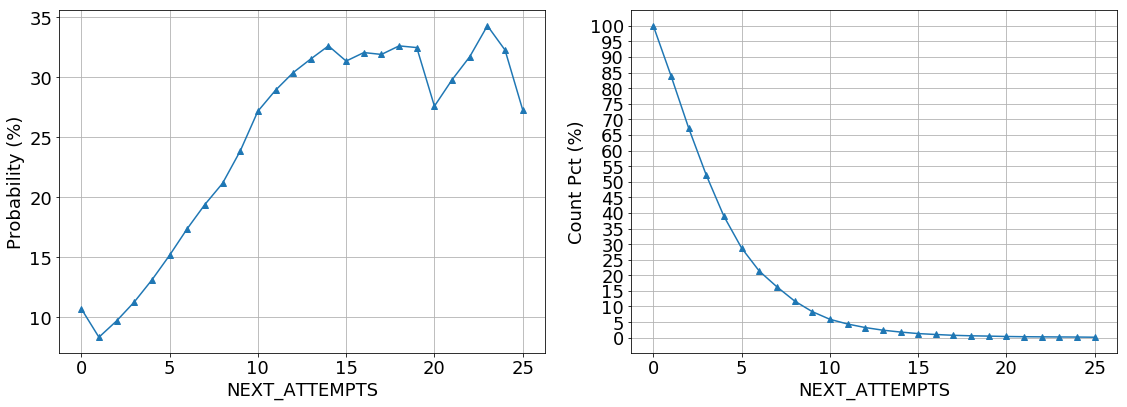

In [116]:
greaterThanProbs(df_1.NEXT_ATTEMPTS, df_1.NEXT_AT_RISK, binSize=1, plot=True)